I have created this project to practice google Cloud, Biq Query and Python.So I have taken 1 Dataset and using that dataset I tried to do Data Modeling like sql using the Taxi Datset I have created different Tables. I am uploading Data modelic pic to understand it better Further I was planning to do visulaization using Tableau but due to public verson of tableau I am not able to connect GCP with Tableau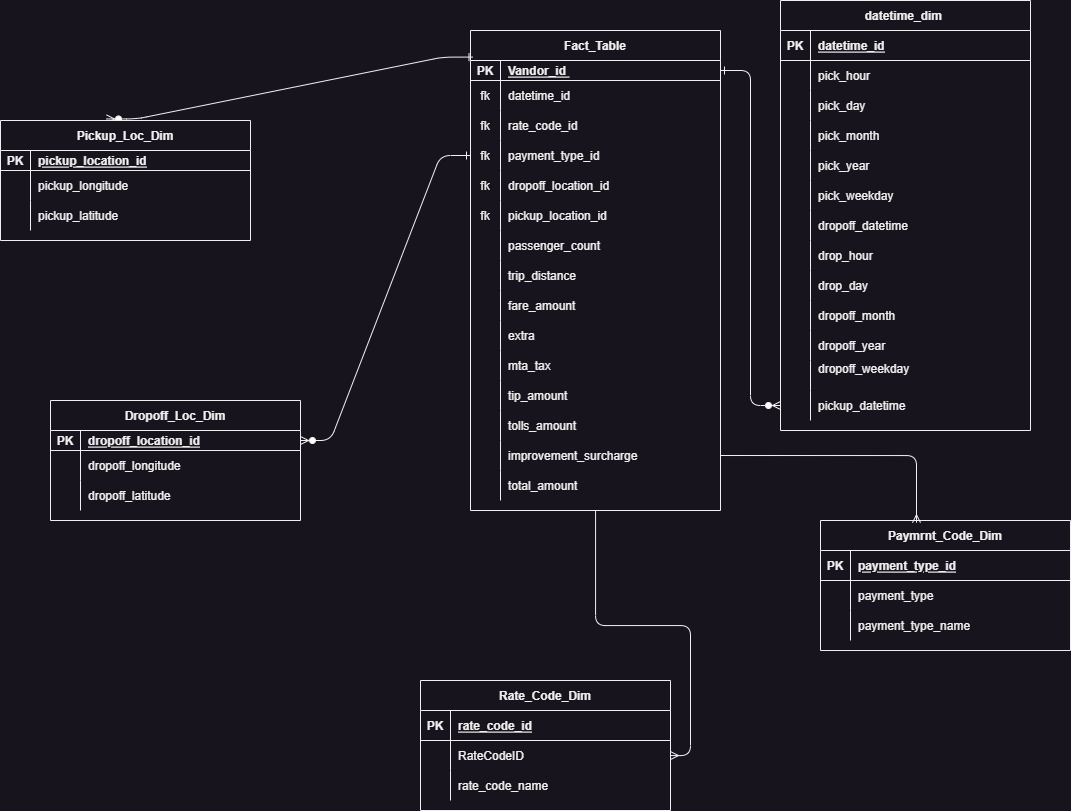

In [14]:

import pandas as pd
import io
import requests
import datetime
from google.cloud import bigquery
import pandas as pd
from google.cloud.bigquery import SchemaField
from typing import List
from google.oauth2 import service_account

In [15]:
url='https://storage.googleapis.com/uber-data-chirag/uber_data.csv'
response = requests.get(url)


In [16]:
df=pd.read_csv(io.StringIO(response.text),sep=",")


In [17]:
#df.info()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,1,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,1,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [18]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [19]:
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index


In [37]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [20]:
df_datetime=df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
df_datetime['pick_hour']=df_datetime['tpep_pickup_datetime'].dt.hour
df_datetime['pick_day']=df_datetime['tpep_pickup_datetime'].dt.day
df_datetime['pick_month']=df_datetime['tpep_pickup_datetime'].dt.month
df_datetime['pick_year']=df_datetime['tpep_pickup_datetime'].dt.year
df_datetime['pick_weekday']=df_datetime['tpep_pickup_datetime'].dt.weekday

#datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
df_datetime['drop_hour']=df_datetime['tpep_dropoff_datetime'].dt.hour
df_datetime['drop_day']=df_datetime['tpep_dropoff_datetime'].dt.day
df_datetime['drop_month']=df_datetime['tpep_dropoff_datetime'].dt.month
df_datetime['drop_year']=df_datetime['tpep_dropoff_datetime'].dt.year
df_datetime['drop_weekday']=df_datetime['tpep_dropoff_datetime'].dt.weekday


df_datetime['datetime_id']=df_datetime.index
df_datetime=df_datetime[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

df_datetime.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In [21]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

df_rate_code= df[['RatecodeID']].reset_index(drop=True)
df_rate_code['rate_code_id']=df_rate_code.index
df_rate_code['rate_code_name'] =df_rate_code['RatecodeID'].map(rate_code_type)
df_rate_code =df_rate_code[['rate_code_id','RatecodeID','rate_code_name']]



In [22]:
df_rate_code.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [23]:
df_pickup_location=df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
df_pickup_location['pickup_loc_id']=df_pickup_location.index
df_pickup_location=df_pickup_location[['pickup_loc_id','pickup_longitude', 'pickup_latitude']]



In [24]:
df_pickup_location.head()

,pickup_loc_id,pickup_longitude,pickup_latitude
0,0,-73.976746,40.765152
1,1,-73.983482,40.767925
2,2,-73.782021,40.644810
3,3,-73.863419,40.769814
4,4,-73.971741,40.792183


In [25]:
df_dropoff_location=df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
df_dropoff_location['dropoff_loc_id']=df_dropoff_location.index
df_dropoff_location=df_dropoff_location[['dropoff_loc_id','dropoff_longitude', 'dropoff_latitude']]


In [26]:
df_dropoff_location.head()

,dropoff_loc_id,dropoff_longitude,dropoff_latitude
0,0,-74.004265,40.746128
1,1,-74.005943,40.733166
2,2,-73.974541,40.675770
3,3,-73.969650,40.757767
4,4,-74.177170,40.695053


In [27]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
df_payment_type=df[['payment_type']].reset_index(drop=True)
df_payment_type['payment_type_id']=df_payment_type.index
df_payment_type['payment_type_name']=df_payment_type['payment_type'].map(payment_type_name)
df_payment_type=df_payment_type[['payment_type_id','payment_type','payment_type_name']]


In [28]:
df_payment_type.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


In [29]:
fact_table = df.merge(df_rate_code, left_on='trip_id', right_on='rate_code_id') \
             .merge(df_pickup_location, left_on='trip_id', right_on='pickup_loc_id') \
             .merge(df_dropoff_location, left_on='trip_id', right_on='dropoff_loc_id')\
             .merge(df_datetime, left_on='trip_id', right_on='datetime_id') \
             .merge(df_payment_type, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id','rate_code_id','store_and_fwd_flag','pickup_loc_id', 'dropoff_loc_id',
               'payment_type_id','passenger_count','trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
               'improvement_surcharge','total_amount']]


In [54]:
fact_table.head()


In [30]:
#creating Dictionary for GCP operations
Data_dict={
    "payment_type":df_payment_type.to_dict(),
    "Datetime":df_datetime.to_dict(),
    "Dropoff_loc":df_dropoff_location.to_dict(),
    "pickup_loc":df_pickup_location.to_dict(),
    "rate_type":df_rate_code.to_dict(),
    "fact_table":fact_table.to_dict(),
}


In [31]:
def bq_create_dataset(client, dataset):
    dataset_ref = bigquery_client.dataset(dataset)

    try:
        dataset = bigquery_client.get_dataset(dataset_ref)
        print('Dataset {} already exists.'.format(dataset))
    except NotFound:
        dataset = bigquery.Dataset(dataset_ref)
        dataset.location = 'US'
        dataset = bigquery_client.create_dataset(dataset)
        print('Dataset {} created.'.format(dataset.dataset_id))
    return dataset



In [48]:
#Function to create a dataset in Table
def bq_create_table(client, dataset, table_name,table_data):
    dataset_ref = bigquery_client.dataset(dataset)

    # Prepares a reference to the table
    table_ref = dataset_ref.table(table_name)

    try:
        table =  bigquery_client.get_table(table_ref)
        print('table {} already exists.'.format(table))
    except NotFound:

        dict_to_frame=pd.DataFrame(table_data)                                  
        Schema= generate_bigquery_schema(dict_to_frame)
        table = bigquery.Table(table_ref,schema=Schema)
        table = bigquery_client.create_table(table)
        print('table {} created.'.format(table.table_id))
    return table



In [104]:
#Function to export data into table in Bigquery
def export_items_to_bigquery(client, dataset, table_name, table_data):
    # Prepares a reference to the dataset
    dataset_ref = client.dataset(dataset)

    table_ref = dataset_ref.table(table_name)

    table = client.get_table(table_ref)  # API call
    data_list = pd.DataFrame.from_dict(table_data)  # Convert DataFrame to list of dictionaries

    # Insert data from the DataFrame
    errors = client.insert_rows_from_dataframe(table, data_list)  # API request
    

In [38]:
#Genrate Schema for Table 

def generate_bigquery_schema(table_data:pd.DataFrame) -> List[SchemaField]:

    TYPE_MAPPING = {
        "i": "INTEGER",
        "u": "NUMERIC",
        "b": "BOOLEAN",
        "f": "FLOAT",
        "O": "STRING",
        "S": "STRING",
        "U": "STRING",
        "M": "TIMESTAMP",
    }
    schema = []
    for column, dtype in table_data.dtypes.items():
        val = table_data[column].iloc[0]
        mode = "REPEATED" if isinstance(val, list) else "NULLABLE"

        if isinstance(val, dict) or (mode == "REPEATED" and isinstance(val[0], dict)):
            fields = generate_bigquery_schema(pd.json_normalize(val))
        else:
            fields = ()

        type = "RECORD" if fields else TYPE_MAPPING.get(dtype.kind)
        schema.append(
            SchemaField(
                name=column,
                field_type=type,
                mode=mode,
                fields=fields,
            )
        )
    return schema



In [105]:
#import libraries
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
key_path = '//content//uber-data-387518-d26ab336faa3.json'
project_id = 'uber-data-387518'

bigquery_client = bigquery.Client.from_service_account_json(key_path, project=project_id)
dataset = "Taxi_Data"
dataset_erro = bq_create_dataset(bigquery_client, dataset)
for tab_key,tab_val in Data_dict.items():  
      table = bq_create_table(bigquery_client, dataset, tab_key,tab_val)


Dataset Dataset(DatasetReference('uber-data-387518', 'Taxi_Data')) already exists.
table uber-data-387518.Taxi_Data.payment_type already exists.
table uber-data-387518.Taxi_Data.Datetime already exists.
table uber-data-387518.Taxi_Data.Dropoff_loc already exists.
table uber-data-387518.Taxi_Data.pickup_loc already exists.
table uber-data-387518.Taxi_Data.rate_type already exists.
table uber-data-387518.Taxi_Data.fact_table already exists.


In [103]:
#Creating Tble in Big Query
export_items_to_bigquery(bigquery_client, dataset, 'fact_table',Data_dict['fact_table'])
export_items_to_bigquery(bigquery_client, dataset, 'Dropoff_loc',Data_dict["Dropoff_loc"])
export_items_to_bigquery(bigquery_client, dataset, 'pickup_loc',Data_dict['pickup_loc'])
export_items_to_bigquery(bigquery_client, dataset, 'Datetime',Data_dict['Datetime'])
export_items_to_bigquery(bigquery_client, dataset, 'payment_type',Data_dict['payment_type'])
export_items_to_bigquery(bigquery_client, dataset, 'rate_type',Data_dict['rate_type'])
